This is the second version of my public kernel(Intrusion Detection System). ANN is also trained & tested on the dataset in this version.
I would really appreciate your feedback.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:

print(os.listdir('/content/drive/MyDrive/kdd-cup-1999-data'))

['kddcup.names', 'training_attack_types', 'typo-correction.txt', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent.gz', 'corrected.gz', 'kddcup.data_10_percent.gz', 'kddcup.testdata.unlabeled.gz', 'kddcup.data.gz', 'kddcup.data_10_percent_corrected', 'kddcup.data.corrected']


In [ ]:
with open("/content/drive/MyDrive/kdd-cup-1999-data/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
with open("/content/drive/MyDrive/kdd-cup-1999-data/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [ ]:
path = "/content/drive/MyDrive/kdd-cup-1999-data/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


In [ ]:
df.shape

(494021, 43)

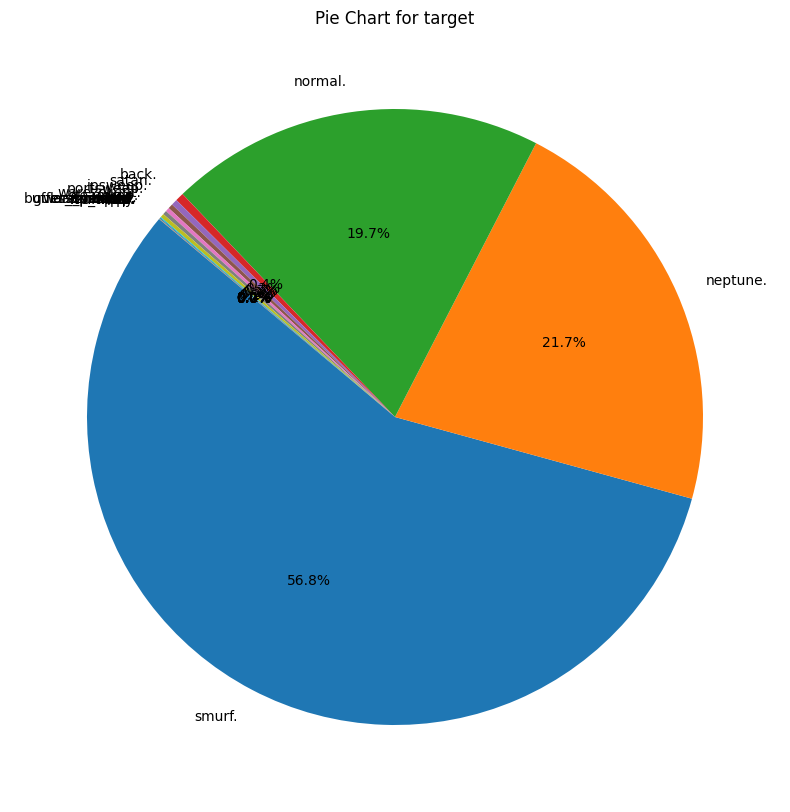

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'target'

def plot_pie_chart(dataframe, target_column):

    # Count the occurrences of each unique value in the target column
    target_counts = dataframe[target_column].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(10, 10))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {target_column}')
    plt.show()

# Example usage:
# Replace 'df' with your actual DataFrame and 'target_column_name' with the name of your target column
plot_pie_chart(df, 'target')


In [ ]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

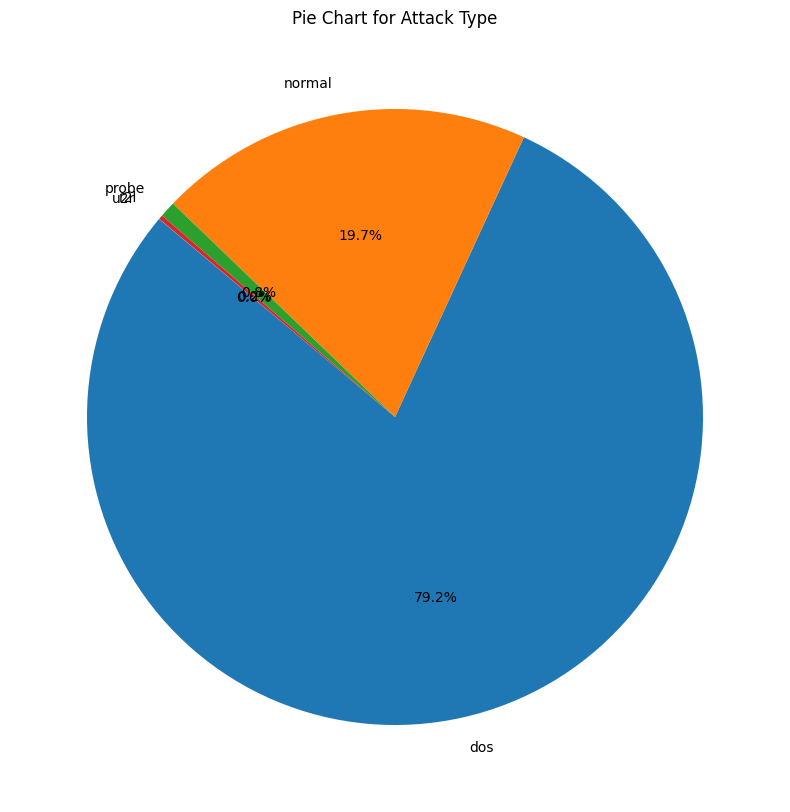

In [ ]:
plot_pie_chart(df, 'Attack Type')

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [ ]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [ ]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

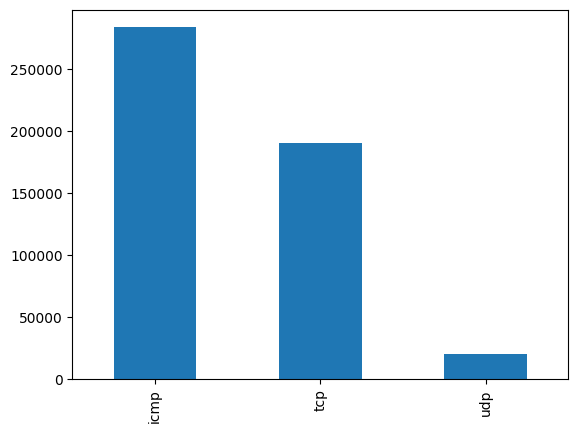

In [ ]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

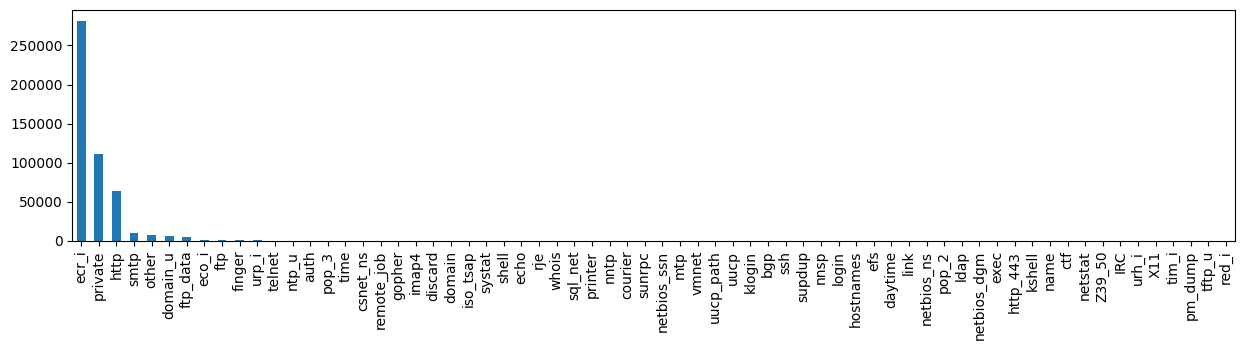

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')

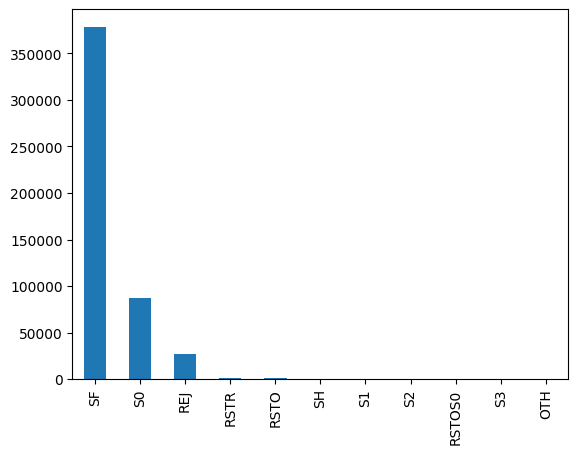

In [ ]:
bar_graph('flag')

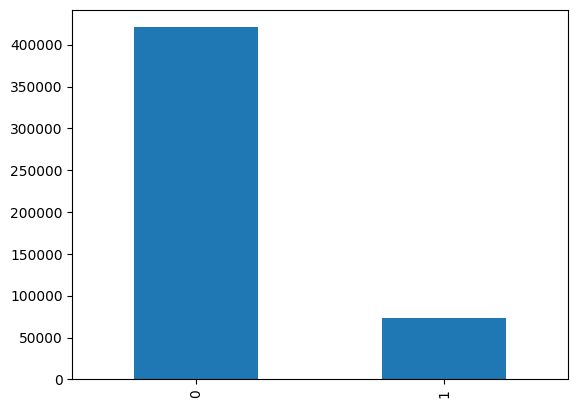

In [ ]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

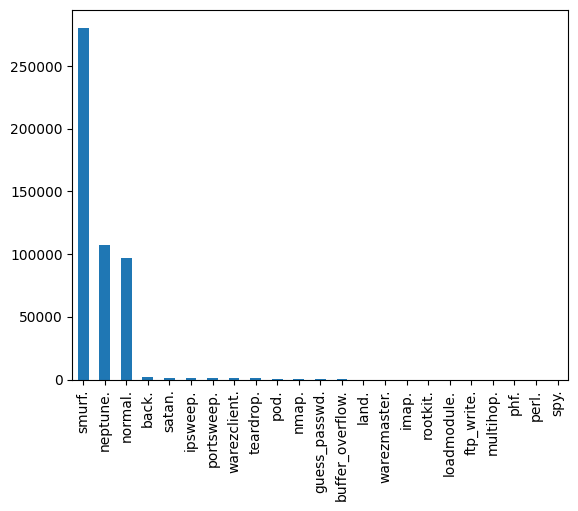

In [ ]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

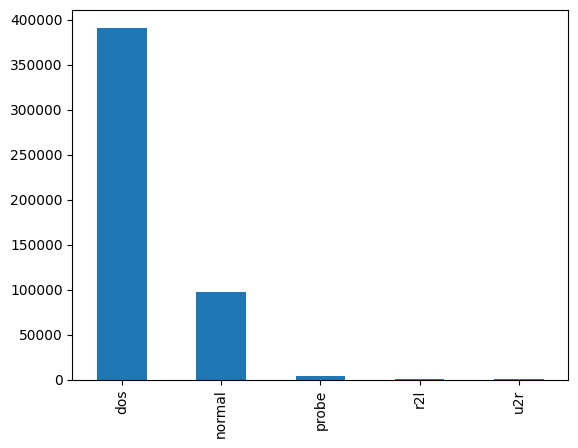

In [ ]:
bar_graph('Attack Type')

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

<ipython-input-26-31c74935275d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-26-31c74935275d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


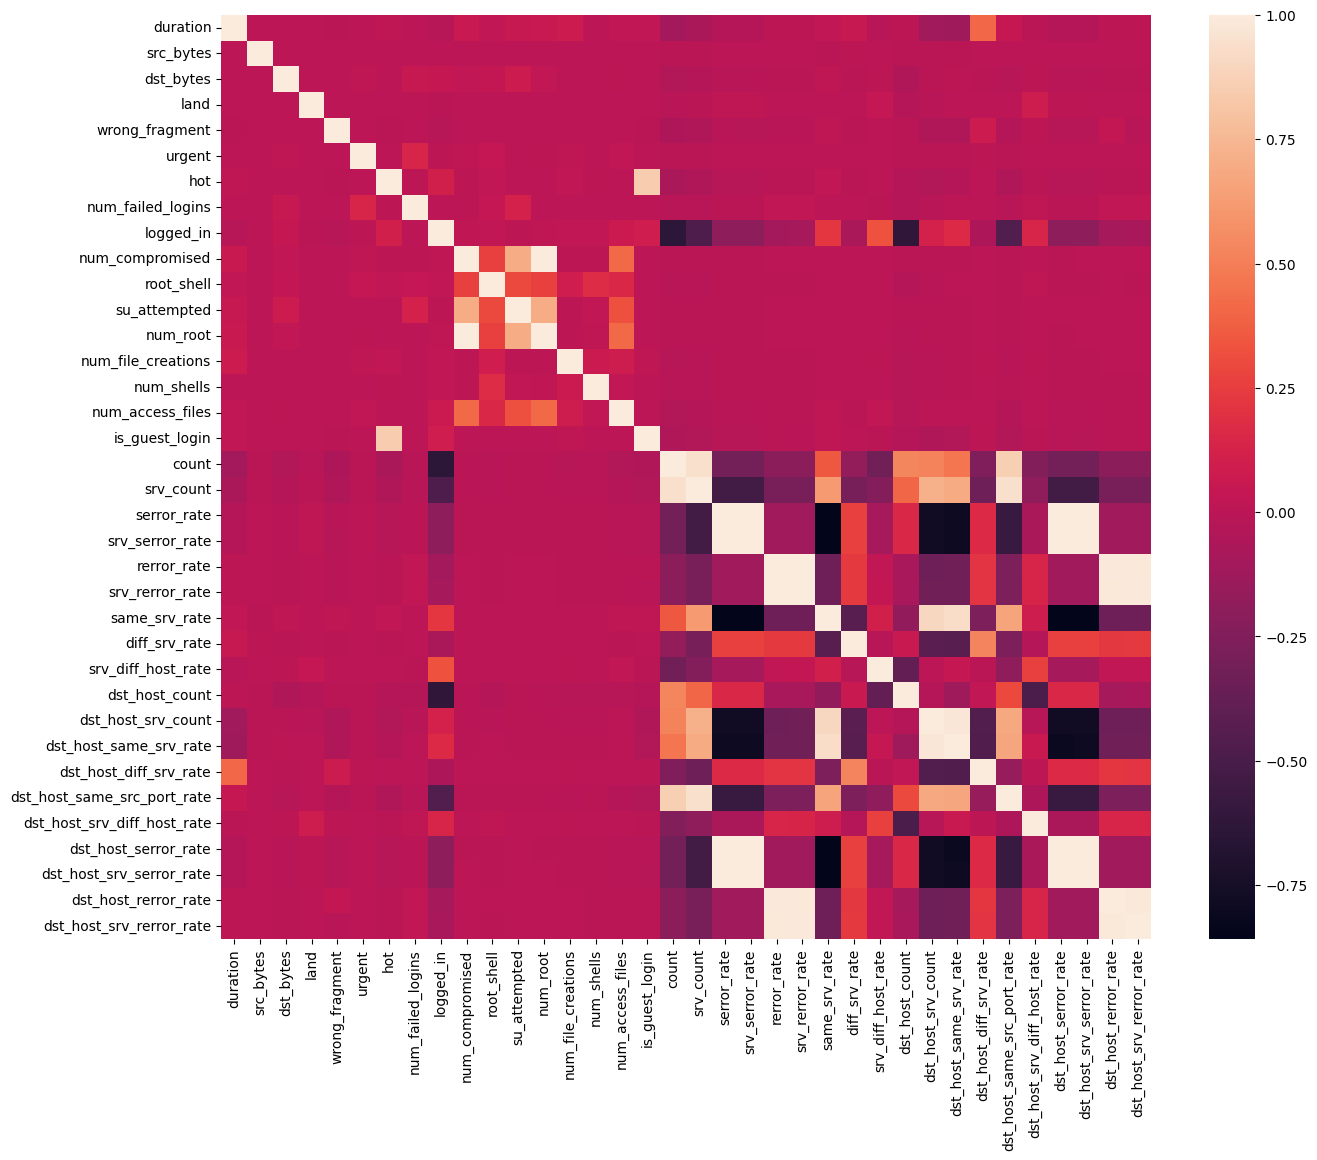

In [ ]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

### Removing highly correlated features

<ipython-input-27-d926854c2eb6>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-27-d926854c2eb6>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-27-d926854c2eb6>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


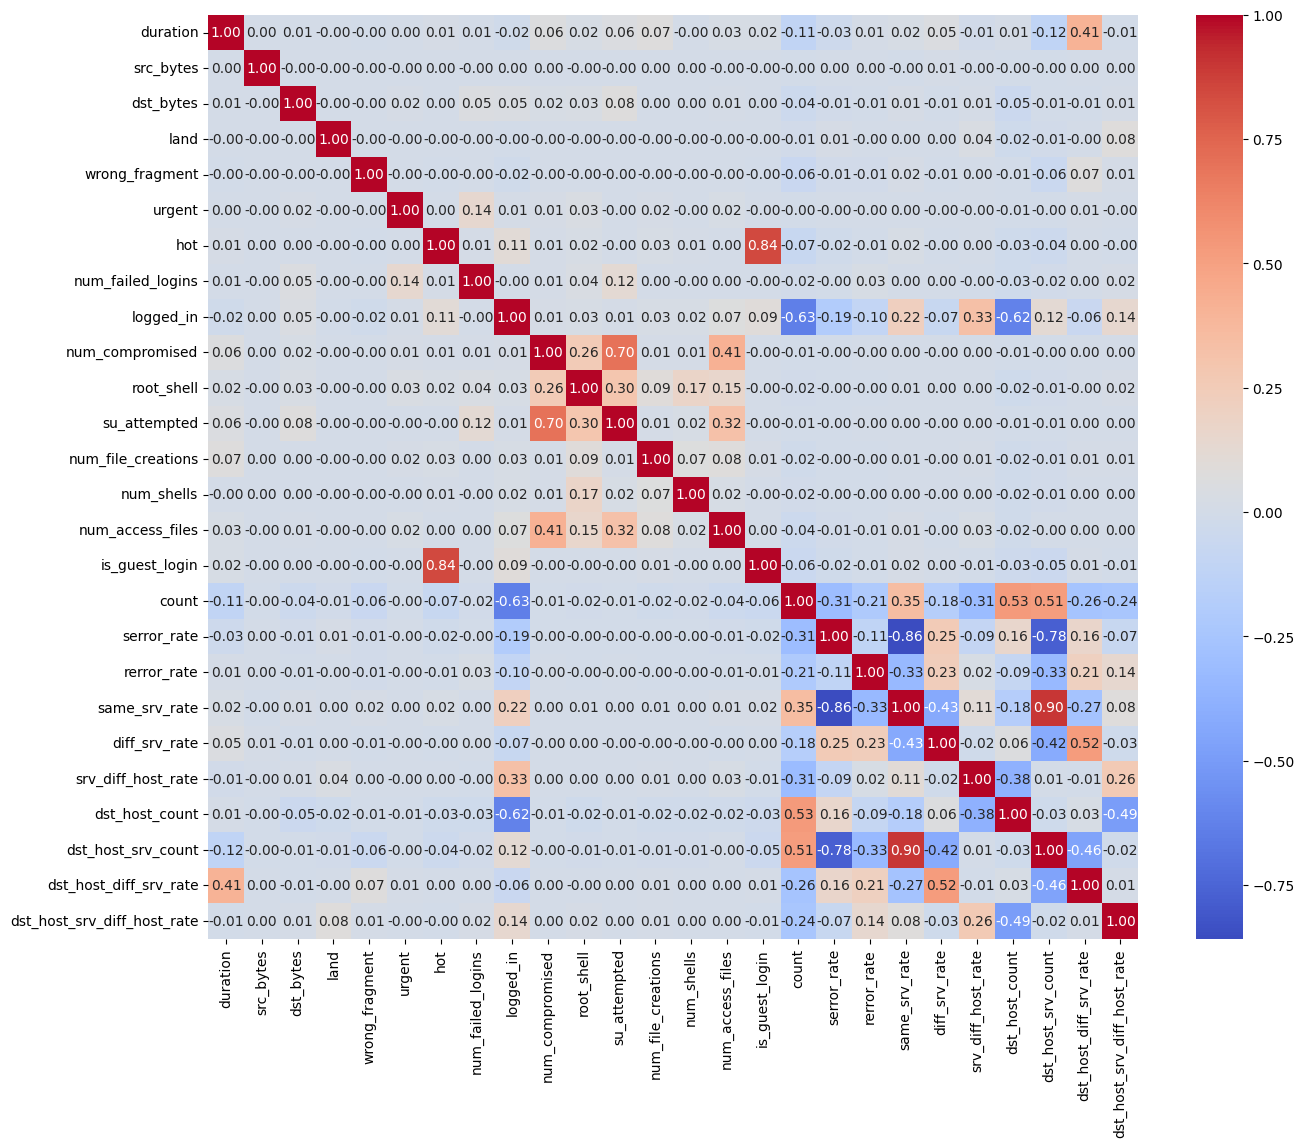

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Your existing code to clean and prepare the DataFrame
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]]

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the threshold for correlation
threshold = 0.9

# Find and remove highly correlated features
correlated_features = set()
dropped_columns = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
            dropped_columns.append(colname)

df = df.drop(correlated_features, axis=1)


# Plot the correlation matrix after removing highly correlated features
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
# Print the columns that have been dropped
print("Columns dropped due to high correlation (> {}): {}".format(threshold, dropped_columns))

Columns dropped due to high correlation (> 0.9): ['num_root', 'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.0,normal.,normal


In [ ]:
df.shape

(494021, 31)

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_srv_diff_host_rate', 'target', 'Attack Type'],
      dtype='object')

In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-32-2938f6df5f03>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_srv_count                106.040437
count     

FEATURE MAPPING

In [ ]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.0,normal.,normal


In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
df.shape

(494021, 30)

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.0,normal.,normal


In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count       

MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df['Attack Type']
X = df.drop(['Attack Type',], axis=1)
X_data, X_test, Y_data, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

sc = MinMaxScaler()
X_data = sc.fit_transform(X_data)
X_test = sc.transform(X_test)

# Split test and train data
print(X_data.shape, X_test.shape)
print(Y_data.shape, Y_test.shape)

(494021, 29)
(370515, 28) (123506, 28)
(370515,) (123506,)


In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_data,Y_data)


In [ ]:
X_train, X_testa, Y_train, Y_testa = train_test_split(X_resampled, y_resampled, train_size=50000, test_size=10000,stratify=y_resampled,shuffle=True , random_state=42)

# Split test and train data
print(X_resampled.shape, y_resampled.shape)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1467959, 28) (1467959,)
(50000, 28) (50000,)
(123506, 28) (123506,)


In [ ]:
Y_test.value_counts()

dos       97876
normal    24267
probe      1051
r2l         296
u2r          16
Name: Attack Type, dtype: int64

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest, f_classif




# Apply SelectKBest with f_classif as the scoring function to select the top 10 features
k_best_selector = SelectKBest(score_func=f_classif, k=10)
X_selected = k_best_selector.fit_transform(X_train,Y_train)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

# Apply the same feature selection to X_test (assuming X_test is a DataFrame)
X_test_selected =k_best_selector.transform(X_test)
# X_test_selected1 =k_best_selector.transform(X_testa)

# Create individual models with the selected features
base_models_selected = [
    ('svm', SVC()),
    ('knn', KNeighborsClassifier()),
]

# Apply the same feature selection to X_test

# Create a meta-model
meta_model = RandomForestClassifier()

# Create a stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models_selected,
    final_estimator=meta_model,
)
# X_train, X_test, Y_train, Y_test
# Train the stacking model
stacking_model.fit(X_selected,Y_train)

# Make predictions
predictions1 = stacking_model.predict(X_test_selected)
# predictions11 = stacking_model.predict(X_test_selected1)

# Calculate and print D1 score
d1_score = f1_score(Y_test, predictions1, average = 'weighted')  # Assuming positive class is 'dos'
print(f'F1 Score: {d1_score}')
# d1_score = f1_score(Y_testa, predictions11, average = 'weighted')  # Assuming positive class is 'dos'
# print(f'F1 Score: {d1_score}')

# Print classification report
print('Classification Report:')
print(classification_report(Y_test, predictions1))
# print('Classification Report:')
# print(classification_report(Y_testa, predictions11))


F1 Score: 0.9880158066971423
Classification Report:
              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     97876
      normal       0.97      0.97      0.97     24267
       probe       0.73      0.98      0.83      1051
         r2l       0.38      0.62      0.47       296
         u2r       0.10      0.69      0.17        16

    accuracy                           0.99    123506
   macro avg       0.63      0.85      0.69    123506
weighted avg       0.99      0.99      0.99    123506



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_resampled, y_resampled, X_test, and Y_test are defined as DataFrames

# # Shuffle the resampled data
# X_resampled_shuffled, y_resampled_shuffled = shuffle(X_resampled, y_resampled, random_state=42)

# # Take a subset of the shuffled data (e.g., 10,000 samples)
# subset_size = 10000
# X_subset = X_resampled_shuffled.iloc[:subset_size, :]
# y_subset = y_resampled_shuffled.iloc[:subset_size]

# Apply SelectKBest with f_classif as the scoring function to select the top 10 features
k_best_selector = SelectKBest(score_func=f_classif, k=10)
X_selected = k_best_selector.fit_transform(X_train,Y_train)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

# Apply the same feature selection to X_test (assuming X_test is a DataFrame)
X_test_selected =k_best_selector.transform(X_test)
X_test_selected1 =k_best_selector.transform(X_testa)

# Create individual models with the selected features
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Create a voting classifier
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('knn', knn_model),
], voting='hard')  # Change 'hard' to 'soft' if you want soft voting

# Train the voting model
voting_model.fit(X_selected, Y_train)

# Make predictions
predictions = voting_model.predict(X_test_selected)
# predictions0 = voting_model.predict(X_test_selected1)
# Calculate and print D1 score
d1_score = f1_score(Y_test, predictions, average = 'weighted')  # Assuming positive class is 'dos'
print(f'F1 Score: {d1_score}')
# Print classification report
print('Classification Report:')
print(classification_report(Y_test, predictions))


F1 Score: 0.9870022846794306
Classification Report:
              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     97876
      normal       0.97      0.96      0.97     24267
       probe       0.64      0.97      0.77      1051
         r2l       0.41      0.70      0.52       296
         u2r       0.09      0.62      0.16        16

    accuracy                           0.99    123506
   macro avg       0.62      0.85      0.68    123506
weighted avg       0.99      0.99      0.99    123506

